In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [2]:
df = pd.read_csv("netflix_titles.csv")
df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [5]:
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [6]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.isnull()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,False,False,False,False,True,False,False,False,False,False,False,False
1,False,False,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False
3,False,False,False,True,True,True,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,False,False,False,False,False,False,False,False,False,False,False,False
8803,False,False,False,True,True,True,False,False,False,False,False,False
8804,False,False,False,False,False,False,False,False,False,False,False,False
8805,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df['cast'].replace(np.nan,'NOT PREAENT',inplace=True)
df['director'].replace(np.nan,'NOT PREAENT',inplace=True)
df.dropna(inplace=True)
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NOT PREAENT,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NOT PREAENT,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."


In [9]:
df.isnull().sum ()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

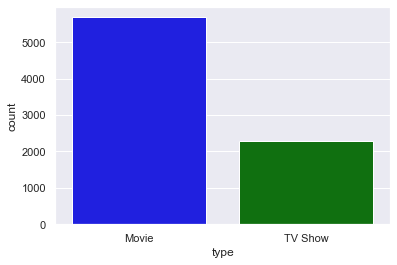

In [10]:
sns.set(style='darkgrid')
pl=sns.countplot(x='type',data=df,palette=['Blue','Green'])

In [11]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR'], dtype=object)

<AxesSubplot:xlabel='rating', ylabel='count'>

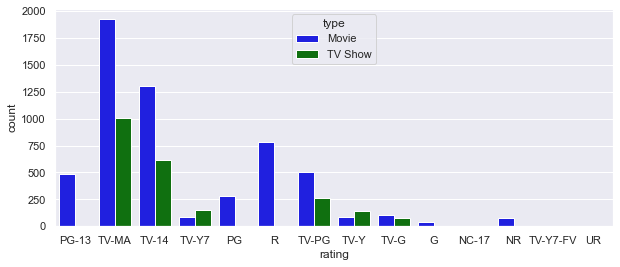

In [12]:
rate=['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR', 'TV-Y7-FV', 'UR']
plt.figure(figsize=(10,4))
sns.countplot(x='rating',data=df,hue=df.type,order=rate,palette=['Blue','Green'])

In [13]:
df.duplicated().sum()

0

In [14]:
ratings_ages= {
    'TV-PG': 'Child',
    'TV-MA': 'Adult',
    'TV-Y7-FV': 'Child',
    'TV-Y7': 'Child',
    'TV-14': 'Adolesent',
    'R': 'Adolecent',
    'TV-Y': 'Infant',
    'NR': 'Adult',
    'PG-13': 'Teen',
    'TV-G': 'Infant',
    'PG': 'Child',
    'G': 'Infant',
    'UR': 'Adult',
    'NC-17': 'Adult'}
df["rating_ages"] = df['rating'].replace(ratings_ages)
df['rating_ages'].head(10)


0          Teen
1         Adult
4         Adult
7         Adult
8     Adolesent
9          Teen
12        Adult
15        Adult
17        Adult
21    Adolesent
Name: rating_ages, dtype: object

In [15]:
countryContent = df.groupby(['type'])['country'].value_counts().head(10)
countryContent = countryContent.to_frame(name = 'Country Content')
countryContent

Country Content
type  country                        
Movie United States              2055
      India                       893
      United Kingdom              206
      Canada                      122
      Spain                        97
      Egypt                        92
      Nigeria                      86
      Indonesia                    77
      Japan                        76
      Turkey                       76

<AxesSubplot:title={'center':'Countries with the highest number of movies and shows'}, xlabel='country', ylabel='type'>

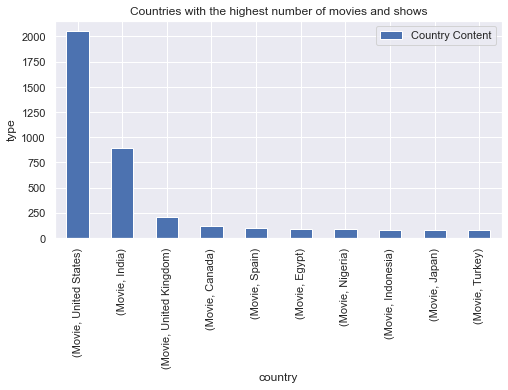

In [16]:

countryContent.plot(figsize = (8,4),kind = 'bar', xlabel = 'country', ylabel = 'type', title = 'Countries with the highest number of movies and shows' )

In [17]:
countryTab = pd.crosstab(df['country'],['type']).sort_values(by = 'type', ascending = True)[-10:].reset_index()
countryTab

col_0,country,type
0,Egypt,106
1,Mexico,110
2,France,124
3,Spain,145
4,Canada,181
5,South Korea,199
6,Japan,243
7,United Kingdom,418
8,India,972
9,United States,2809


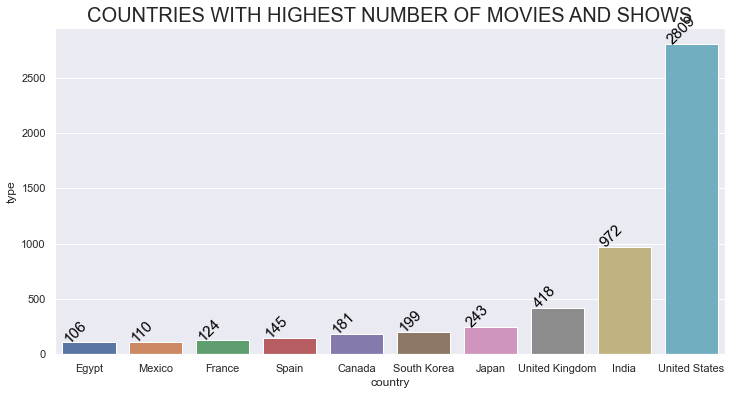

In [18]:
countries=pd.crosstab(df["country"],["type"]).sort_values(by="type",ascending=True)[-10:].reset_index()
plt.figure(figsize=(12,6))
ax=sns.barplot(x=countries["country"],y=countries["type"] )
plt.title("COUNTRIES WITH HIGHEST NUMBER OF MOVIES AND SHOWS",fontsize=20)

for i in ax.patches:
    ax.text(i.get_x(), i.get_height(),str(int((i.get_height()))),rotation=45, fontsize=15, color='black')

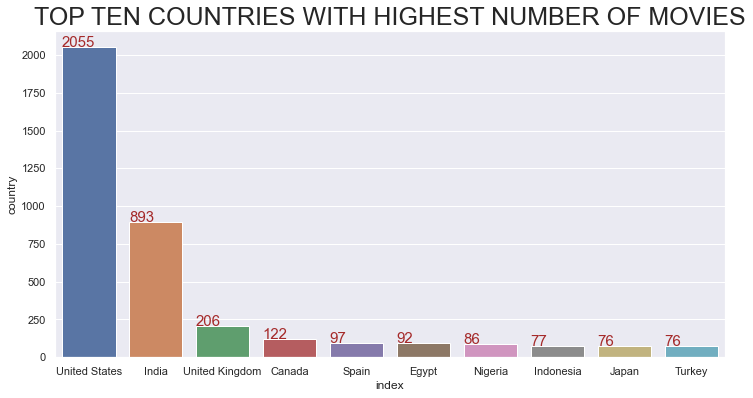

In [19]:
movie=df[df["type"]=="Movie"]
movies=movie["country"].value_counts().reset_index()[0:10]
movies = movies.sort_values(by= 'country', ascending = False)
plt.figure(figsize=(12,6))
plt.title("TOP TEN COUNTRIES WITH HIGHEST NUMBER OF MOVIES",fontsize=25)
ax=sns.barplot(x="index",y="country", data = movies)
for i in ax.patches:
    ax.text(i.get_x(), i.get_height(), str(int(i.get_height())), rotation= 0, fontsize=15 , color = 'brown')

In [20]:
movies

,index,country
0,United States,2055
1,India,893
2,United Kingdom,206
3,Canada,122
4,Spain,97
5,Egypt,92
6,Nigeria,86
7,Indonesia,77
8,Japan,76
9,Turkey,76


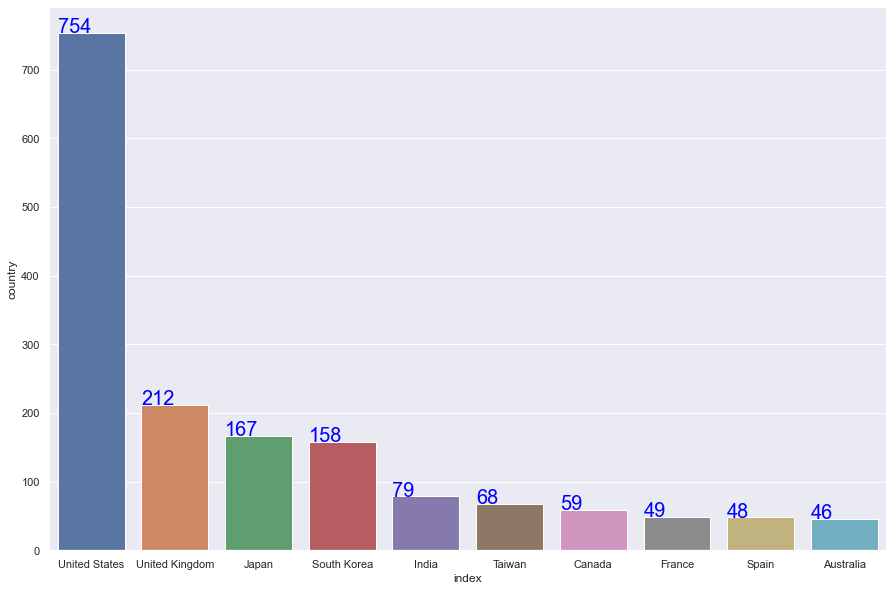

In [21]:
tv = df[df['type']=='TV Show']
television = tv['country'].value_counts().head(10).reset_index()
television
plt.figure(figsize=(15,10))
av = sns.barplot(x=television['index'], y=television['country'])

for i in av.patches:
    av.text(i.get_x(),i.get_height(),str(int(i.get_height())), rotation=0, color = 'Blue', fontsize = 20)

C:\Users\SHIVAM TYAGI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



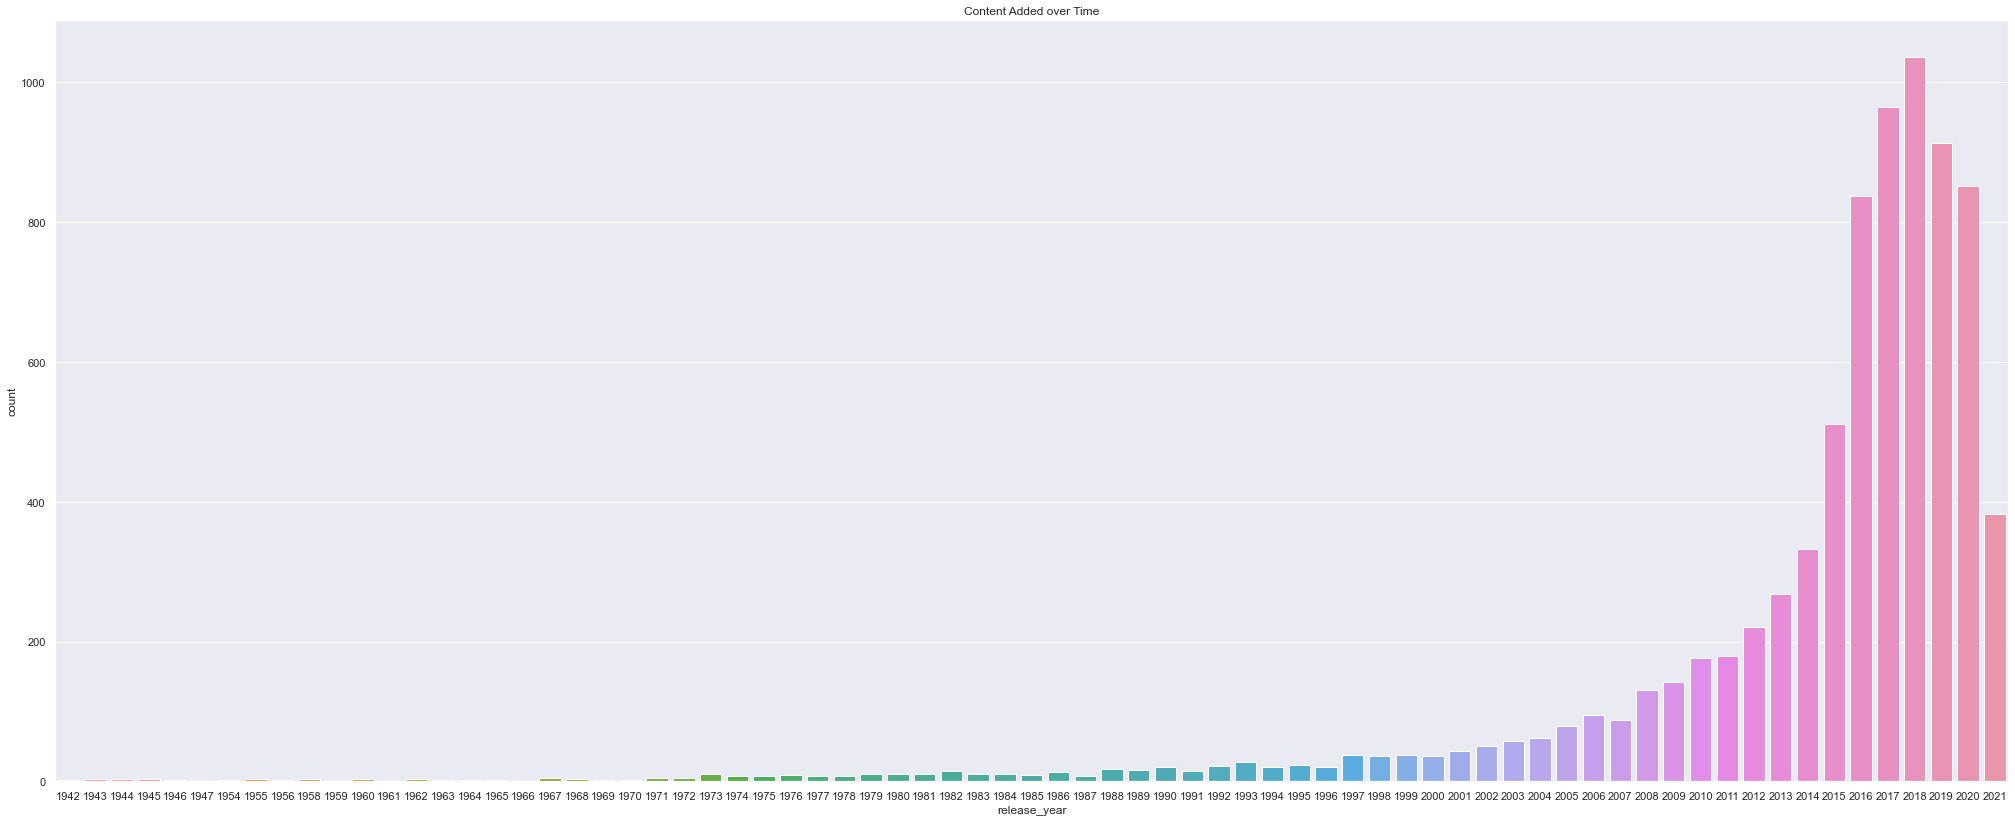

In [22]:
contentYear = df['release_year'].count()
plt.figure(figsize=(35,14))
sns.countplot(df['release_year'])
plt.title('Content Added over Time')
plt.show()

In [23]:
nineteen = df['release_year'][df['release_year']== 2019].count().sum()
twenty = df['release_year'][df['release_year']== 2020].count().sum()
content_percent = (((twenty/nineteen)*100) -100)
round(content_percent)

-7

C:\Users\SHIVAM TYAGI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



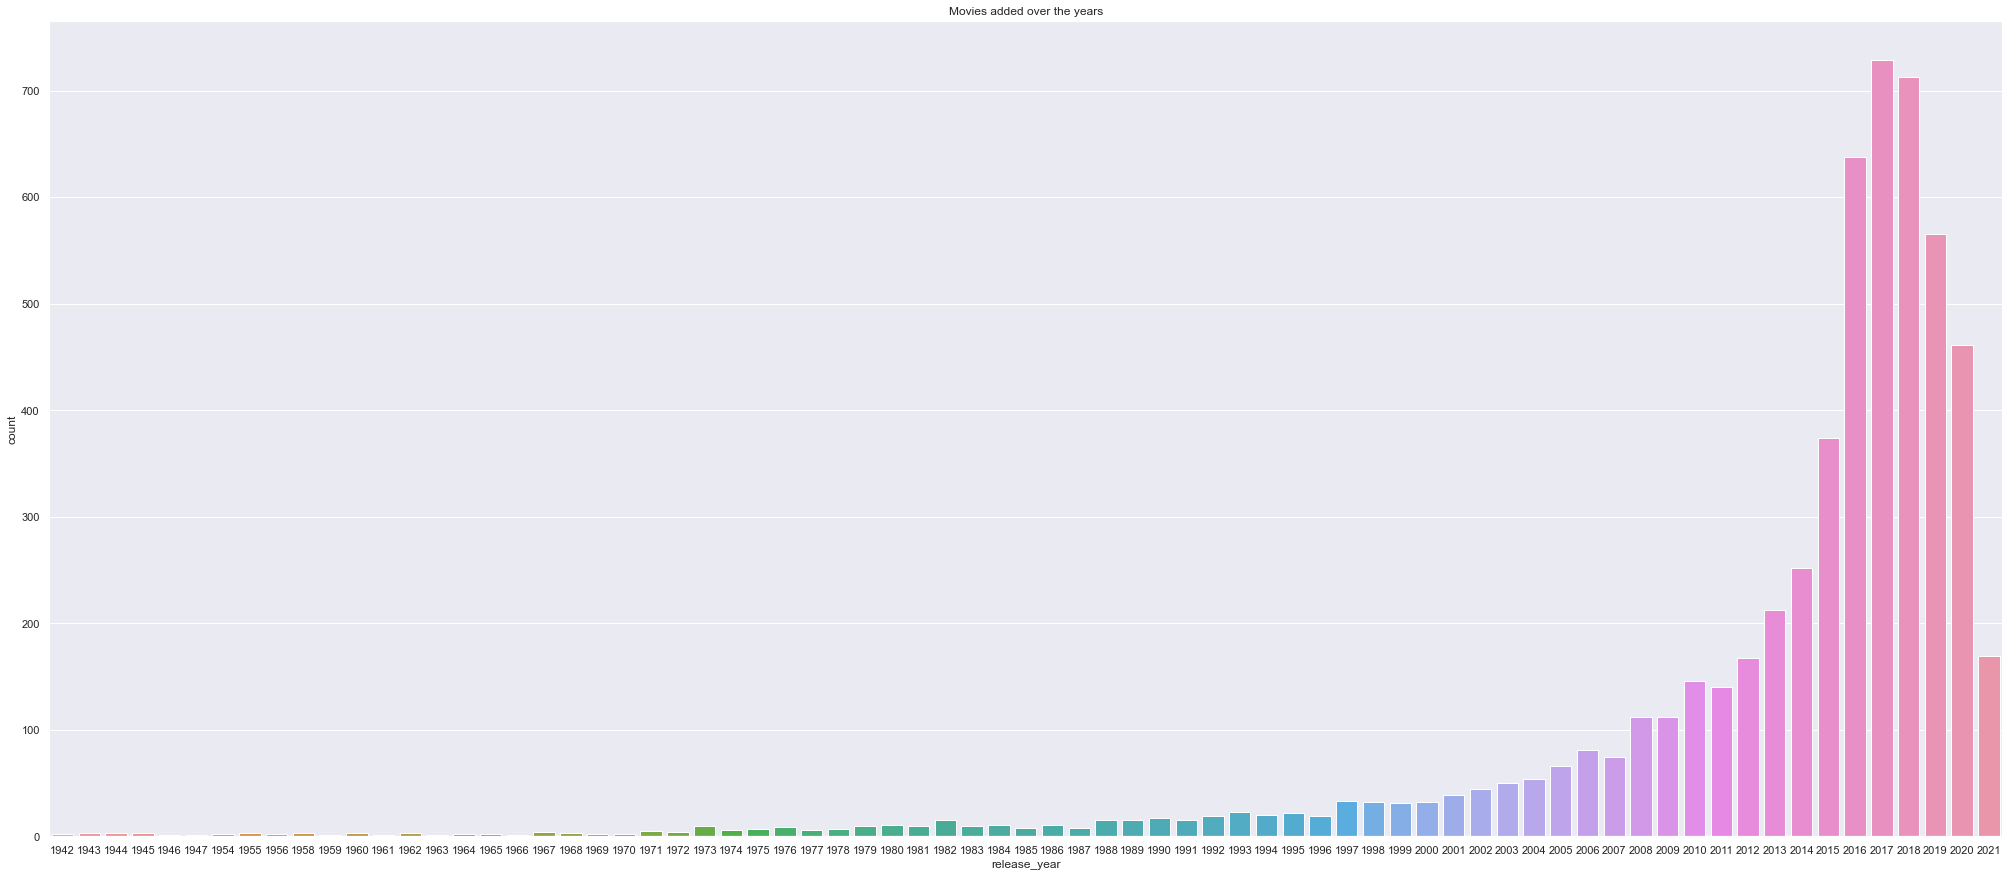

In [24]:
movieContent = df[df['type'] == 'Movie']
plt.figure(figsize = (35,15))
a = sns.countplot(movieContent['release_year'])
plt.title('Movies added over the years')
plt.show()

C:\Users\SHIVAM TYAGI\AppData\Local\Programs\Python\Python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



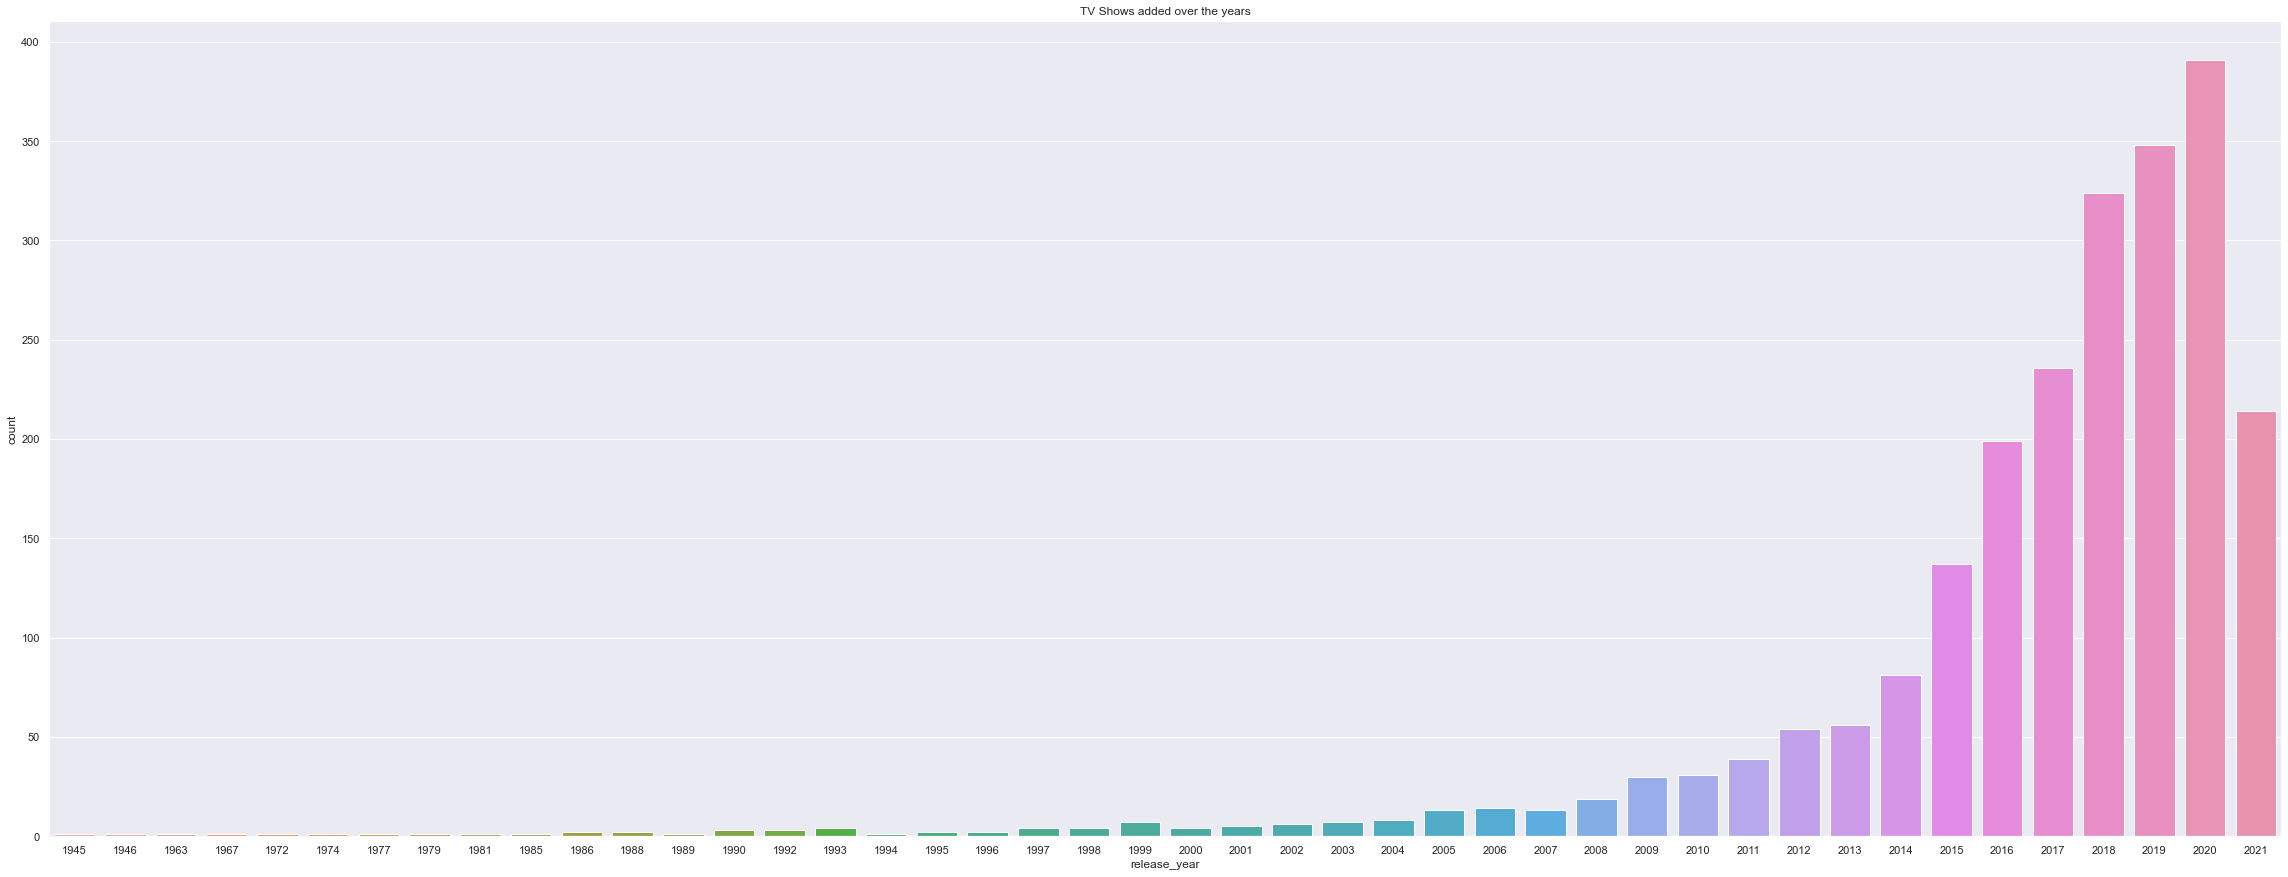

In [25]:
tvContent = df[df['type'] == 'TV Show']
plt.figure(figsize = (40,15))
a = sns.countplot(tvContent['release_year'])
plt.title('TV Shows added over the years')
plt.show()

In [26]:
px.pie(df, names = 'rating_ages', values = df.index)


In [27]:
px.pie(movie,names="rating_ages", values=movie.index, title="Type of content present in movies")

In [28]:
px.pie(tv,names="rating_ages", values=tv.index, title="Type of content present in movies")

In [29]:
new = df[['type', 'release_year']].value_counts().reset_index()
new.columns = ['type', 'release_year', 'number']
#plt.figure()
px.line(data_frame = new, x = 'release_year', y ='number', color = 'type', line_group = 'type', range_x = [2005, 2025])